<a href="https://colab.research.google.com/github/be1le/ML/blob/main/%EC%8B%A0%EC%9A%A9%EA%B1%B0%EB%9E%98%EC%8B%A4%EC%A0%81%EA%B8%B0%EB%B0%98_%EB%8C%80%EC%B6%9C%EA%B0%80%EB%8A%A5%EC%97%AC%EB%B6%80_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time
random.seed(100)

# Data Preprocessing 

In [2]:
dataset = pd.read_csv('P39-Financial-Data.csv')

##  Feature Engineering

In [3]:
dataset = dataset.drop(columns = ['months_employed'])
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

## One Hot Encoding

In [4]:
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

## Removing extra columns

In [5]:
response = dataset["e_signed"]
users = dataset['entry_id']
dataset = dataset.drop(columns = ["e_signed", "entry_id"])

## Splitting into Train and Test Set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# Model Building

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

## Predicting Test Set

In [9]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

## SVM (Linear)

In [10]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting Test Set

In [11]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

## SVM (rbf)

In [12]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)


SVC(random_state=0)

# Predicting Test Set

In [13]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

## SVM (rbf)

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Predicting Test Set

In [15]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

## K-fold Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


# Parameter Tuning

# Round 1: Entropy

In [17]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}
          
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 3924.99 seconds


(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

## Round 2: Entropy

In [18]:
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 1289.60 seconds


(0.6356302654508454,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 12})

# Predicting Test Set

In [19]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


## Round 1: Gini

In [20]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 2352.26 seconds


(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

## Round 2: Gini

In [21]:
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 1136.11 seconds


(0.635420816975755,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 2})

## Predicting Test Set

In [23]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

## EXTRA: Confusion Matrix

Test Data Accuracy: 0.6309


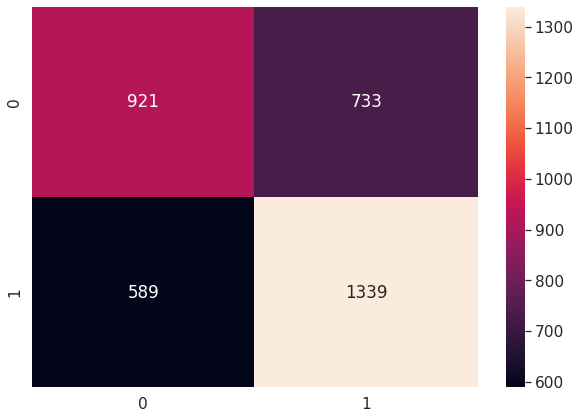

In [24]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))